In [224]:
import numpy as np
import math
import cmath
import matplotlib.pyplot as plt
import sympy as smp
import scipy as sp
from scipy.integrate import cumtrapz
from scipy import integrate
from scipy.integrate import quad
from scipy.integrate import trapz
from scipy.integrate import dblquad

In [225]:
pi = math.pi
m_p= 139.57 #MeV Meson Mass
m_l= 0.511 #MeV Positron Mass
m_l1 = 105.7 #MeV #mass l prime
#m_a => 2 cases: 10, 80 MeV
br = 1. #B(P+ -> l'+vl_1)
m_l=m_l1
m_lp = m_l1

"2 cases, inside dd_branchratio function";
#g_ll=     1      or    1
#g_llbar=  0      or    1
#g_vl=     0      or    0

#E_plus = 1/2*(m_p-E_l+math.sqrt(E_l**2-m_l**2)+m_a**2*(m_p-E_l-math.sqrt(E_l**2-m_l**2))/(m_p**2+m_l**2-2*m_p*E_e))
#E_minus = 1/2*(m_p-E_l-math.sqrt(E_l**2-m_l**2)+m_a**2*(m_p-E_l+math.sqrt(E_l**2-m_l**2))/(m_p**2+m_l**2-2*m_p*E_e))

#m_l < E_l < m_p/2*(1-m_a**2/m_p**2+m_l**2/m_p**2);

In [226]:
#def s_1(g_ll,g_llbar,g_vl,m_a,E_a,E_l):

def s_1(E_a,E_l,g_ll,g_llbar,g_vl,m_a):
  return br/((1-(m_l1**2)/(m_p**2))*(pi))**2*(
  ((g_ll-g_llbar+g_vl)**2/(16*m_l1**2*m_l**2))*(2*(m_p-2*E_l)*E_a-(m_p-2*E_l)**2-m_a**2+m_l**2)
   +(g_ll**2*m_a**2/(2*m_l1**2)*(m_p**2-3*m_p*(E_a+E_l)+2*(E_a+E_l)**2)/(m_p**2-2*m_p*(E_a+E_l)+m_l**2)**2)
   +(((g_ll*(g_llbar-g_vl))/(4*m_l1**2))*(m_p**2-m_a**2+m_l**2-2*m_p*(2*E_a+E_l)+4*E_a*(E_a+E_l))/(m_p**2-2*m_p*(E_a+E_l)+m_l**2))
   )

In [227]:
#S-2
def E_plus(E,m_a):
  return ((1/2)*(m_p-E + math.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E-math.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))
def E_minus(E,m_a):
  return ((1/2)*(m_p-E - math.sqrt(E**2-m_l**2)+ ((m_a**2*(m_p-E+math.sqrt(E**2-m_l**2)))/(m_p**2+m_l**2-2*m_p*E))))

In [228]:
#S-3
def E_l_upper(m_a):
  return (m_p/2)*(1-(m_a/m_p)**2+(m_l/m_p)**2)

def E_l_print(m_a):
  print(f"{m_l} < E_l < {E_l_upper(m_a)}")

In [229]:
# Define the values for m_a

def br_s1_case1(f,g_ll=1,g_llbar=0 ,g_vl=0):
    #conditions for WV

    BR = []
    m_a = np.linspace(1,30,33)
    for m in m_a:
        result, _ = dblquad(f, m_l, E_l_upper(m),
                                  lambda E_l: E_minus(E_l, m), lambda E_l: E_plus(E_l, m),
                                  args=(g_llbar,g_ll,g_vl,m))
        BR.append(result)

    # plotting
    plt.plot(m_a, BR);
    plt.xlabel('m_a')
    plt.ylabel('BR')
    plt.title('WV: BR vs m_a')
    plt.show()

def br_s1_case2(f,g_ll=1,g_llbar=1 ,g_vl=0):
    #conditions for WP

    BR = []
    m_a = np.linspace(1,30,33)
    for m in m_a:
      #dblquad(f, E_l_lower, E_l_upper, E_a_lower, E_a_upper, args)
        result, _ = dblquad(f, m_l, E_l_upper(m),
                                  lambda E_l: E_minus(E_l, m), lambda E_l: E_plus(E_l, m),
                                  args=(g_ll, g_llbar,g_vl,m))
        BR.append(result)

    # plotting
    plt.plot(m_a, BR);
    plt.xlabel('m_a')
    plt.ylabel('BR')
    plt.title('WP: BR vs m_a')
    plt.show()

def br_s1_case12(f):
    g_ll=1
    g_llbar=0
    g_vl=0
    #conditions for WV
    BR1 = []
    m_a = np.linspace(1,30,33)
    for m in m_a:
        result, _ = dblquad(f, m_l, E_l_upper(m),
                                  lambda E_l: E_minus(E_l, m), lambda E_l: E_plus(E_l, m),
                                  args=(g_ll, g_llbar,g_vl,m))
        BR1.append(result)

    #conditions for WP
    g_ll=1
    g_llbar=1
    g_vl=0
    BR2 = []
    m_a = np.linspace(1,30,33)
    for m in m_a:
        result, _ = dblquad(f, m_l, E_l_upper(m),
                                  lambda E_l: E_minus(E_l, m), lambda E_l: E_plus(E_l, m),
                                  args=(g_ll, g_llbar,g_vl,m))
        BR2.append(result)

    fig, axs = plt.subplots(1, 2, figsize=(12,3))

    # Plot for Case 1 on the left subplot
    axs[0].plot(m_a, BR1)
    axs[0].set_title('Double Integral Case 1(WV)',fontweight="heavy")
    axs[0].set_xlabel('$m_a$ (MeV)',fontweight="heavy")
    axs[0].set_ylabel('Double Integral of S-1',fontweight="heavy")

    # Plot for Case 2 on the right subplot
    axs[1].plot(m_a, BR2)
    axs[1].set_title('Double Integral Case 2(WP)',fontweight="heavy")
    axs[1].set_xlabel('$m_a$ (MeV)',fontweight="heavy")


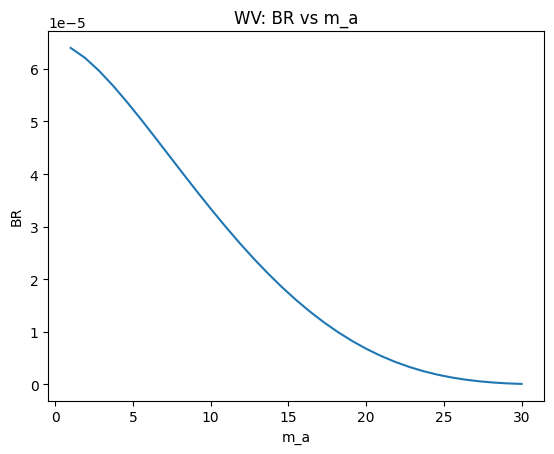

In [230]:
br_s1_case1(s_1)

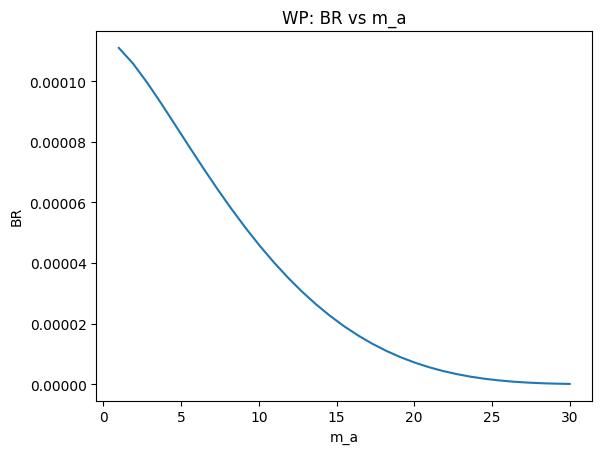

In [231]:
br_s1_case2(s_1)

In [232]:
def s_1_case1(m_a,E_a,E_l):
  return s_1(E_a,E_l,1,0,0,m_a)

def s_1_case2(m_a,E_a,E_l):
  return s_1(E_a,E_l,1,1,0,m_a)

def s_1_case12(m_a,E_a,E_l):
  fig, axs = plt.subplots(1, 2, figsize=(12, 3))
  axs[0].plot(m_a, s_1_case1(m_a,E_a,E_l));
  axs[0].set_title(f'Case 1(WV): $E_a$={E_a}, $E_l$={E_l}',fontweight="heavy")
  axs[0].set_xlabel('$m_a$ (MeV)',fontweight="heavy")
  axs[0].set_ylabel('S-1',fontweight="heavy")

  axs[1].plot(m_a, s_1_case2(m_a,E_a,E_l));
  axs[1].set_title(f'Case 2(WP): $E_a$={E_a}, $E_l$={E_l}',fontweight="heavy");
  axs[1].set_xlabel('$m_a$ (MeV)',fontweight="heavy");

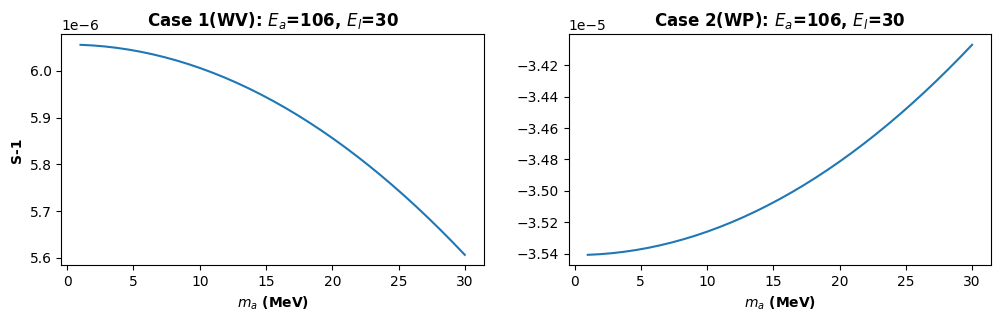

In [233]:
m_a = np.linspace(1,30,33)

s_1_case12(m_a,106,30)

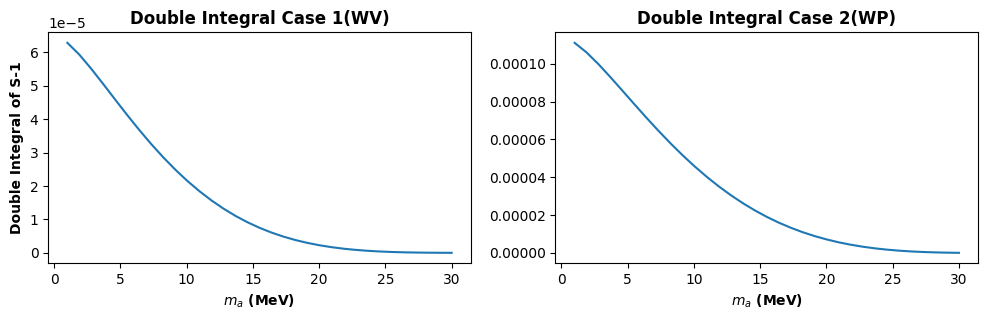

In [234]:
br_s1_case12(s_1)